In [1]:
#pip install numpy matplotlib scipy pandas

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.stats as sps
import pandas as pd

<p align = center>at first we build the needed function for part 1. in random.choice function we tell numpy to choose m * n samples from 1 and 0 with probability of p for 1. the rest is clear</p>

In [3]:
def make_rnd_bin_sample(p : float, m : int, n : int):
    temp = np.random.choice([1,0],m*n,p=[p,1-p])
    return temp.reshape([m,n]).sum(axis=1)

<p align = center>then we make 4 lists to contain test results, and we make a list containing desired p values. then we do the operation for all p values and the given n and m value along with storing the extracted data's var and mean and storing theoritical var and mean data.</p>

In [4]:
pract_variances = list()
pract_means = list()
theo_means = list()
theo_variances = list()
probs = list(np.arange(0,1,0.01))

for p in probs:
    temp = make_rnd_bin_sample(p,5000,500)
    pract_variances.append(np.var(temp))
    pract_means.append(np.mean(temp))
    theo_means.append(500 * p)
    theo_variances.append(500 * p * (1 - p))


<p align = center>in this part we use matplotlib to draw graphs of each of our data.</p>

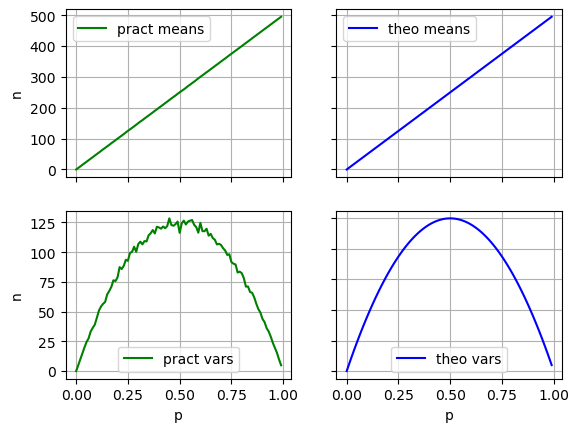

In [5]:
fig, axs = plt.subplots(2,2)
pract_means_line, = axs[0,0].plot(probs, pract_means,label = 'pract means',color = 'green')
theo_means_line, = axs[0,1].plot(probs, theo_means,label = 'theo means',color = 'blue')
pract_means_line, = axs[1,0].plot(probs, pract_variances,label = 'pract vars',color = 'green')
theo_means_line, = axs[1,1].plot(probs, theo_variances,label = 'theo vars',color = 'blue')
for ax in axs.flat:
    ax.set(xlabel='p', ylabel='n')
    ax.grid()
    ax.legend()
for ax in axs.flat:
    ax.label_outer()

plt.show()

<p align = center>as it's clear in the graph results, practical and theoritical values for both var and mean are so close and can be taken equal with little amount of error. it's important to note there is some slite differences between var graphs in the middle of our p range which still does not violate perfect simiularitiy between these two graphs. overall it can be said that the theoritical approach is so precise and can be used in a lot of our real world problems.</p>
<hr></hr>
<p align = center>moving to the next question. first we create 10000 samples of all of the given distributions and store them.</p>

In [6]:
size = 10000
binomial = np.random.binomial(250, 0.008, size)
poisson = np.random.poisson(2,size)
normal = np.random.normal(2,math.sqrt(1.984),size)

<p align = center>then we draw histograms of each distribution based on the number of deathes. earlier testings showed that the death counts would rarely go beyond 8 (as it was mentioned in the text of quesion), therefore only deathes less than 15 would be shown. density argument normalizes the y axis counts and changes the y axis to pdf or pmf of the certain values.</p>

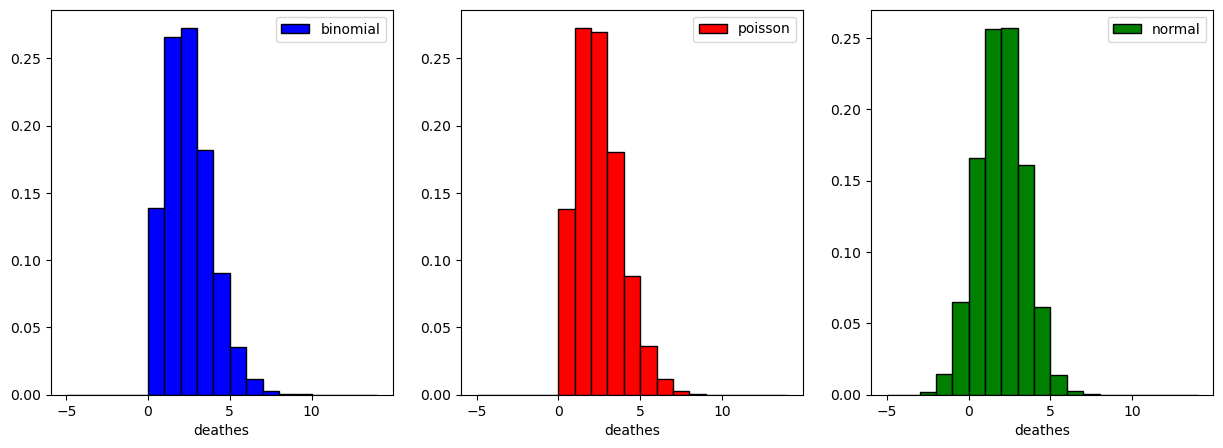

In [7]:
fig,axs = plt.subplots(1,3)
fig.set_size_inches(15,5)
x_axis = np.arange(-5,15,1)

axs[0].hist(binomial, x_axis,edgecolor="black", color='blue',label= "binomial",density= True) 
axs[1].hist(poisson, x_axis,edgecolor="black", color='red',label= "poisson",density=True) 
axs[2].hist(normal, x_axis,edgecolor="black", color='green',label= "normal",density= True) 

for ax in axs:
    ax.legend()
    ax.set( xlabel='deathes')

plt.show()

<p align = center>outcomes are as expected! we can see that with the value chosen for n and p, poisson is a better approximation for bionomial distribution than normal. poisson results are less spreaded than normal, though their numbers are closer to binomial. also normal distribution has some negative results which are not needed. for instance, in range of 0 to 1, both of binomial and poisson have smaller numbers than normal and in range of 1 and 2, their numbers are so close to the normal distribution. bigger ranges act simular to each other, with normal distribution often having smaller numbers in equal death ranges. it's worth to mention that normal is still a good approximation for binomial, but for this n and p, poisson is a better choice based on test results</p>
<hr></hr>
<p align = center>and now question 3!  first we want to see a visualization of the described distribution:</p>

In [8]:
students_count = 100000
test_results = np.random.normal(80,12,students_count)

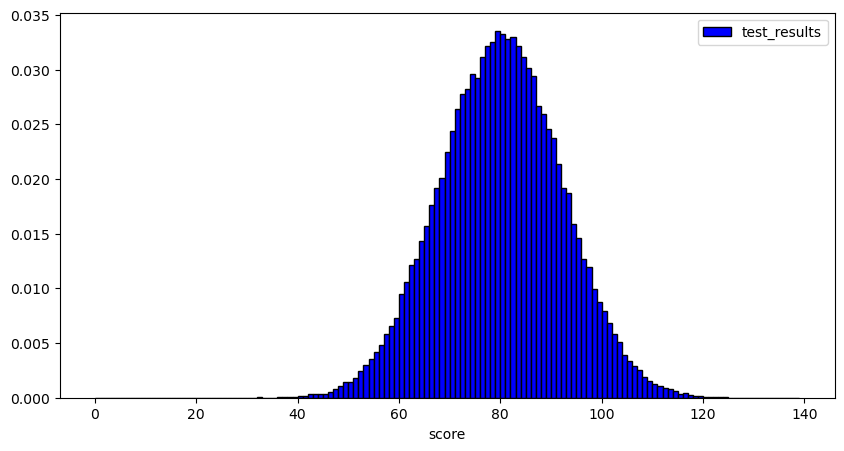

In [9]:
fig,axs = plt.subplots()
fig.set_size_inches(10,5)
x_axis = np.arange(0,140,1)

axs.hist(test_results, x_axis,edgecolor="black", color='blue',label= "test_results",density=True) 


axs.legend()
axs.set( xlabel='score')

plt.show()

<p align = center>and now we define two functions to make us a standard normal value or reverse a standard normal value to the questions conditions</p>

In [10]:
def make_standard(a):
    return (a - 80)/12
def make_reverse_standard(a):
    return 80 + (a * 12)

<p align = center>problem a) we use scipy.stat.norm attribute's ppf method to find the standard percentile of 90 (it's equal to being in the top 10 percent of the class) for the normal distrubution and change it to regular values of this question with our special function. the result will be 95.37.</p>

In [11]:
make_reverse_standard(sps.norm.ppf(0.9))

95.3786187865352

<p align = center>problem b) to find the scores between second and third quartile, we use the previous question's method to find ppf of 0.5 and 0.75. the grades between 80 and 88.09 are between the needed quartiles</p>

In [12]:
print('start:',make_reverse_standard(sps.norm.ppf(0.5)),', end:',make_reverse_standard(sps.norm.ppf(0.75)))

start: 80.0 , end: 88.09387700235298


<p align = center>problem c) we use scipy.stats.norm attribute's cdf method to calculate cdf of a certain standard value. using this method and the special function "make_standard", we calculate cdf of both scores "90" and "80" and subtract them to calculate the probability of scores in this range. the result will be 0.297.</p>

In [13]:
sps.norm.cdf(make_standard(90)) - sps.norm.cdf(make_standard(80))

0.29767161903635686

<p align = center>problem d or bonus) we will take samples with size 100000. for uniform distibution we don't need anything more than score range and size which are 1 , 20 and 100000 respectively. for poisson and bionomial, we will choose 13 for the expectation of our distribution (which makes sense to be the mean of scores in these two courses), and therefore the poisson parameter (np) will be 13 and in bionomial, n will be 20 (which is the maximum grade) and p will be 13/20. finally we sum the results and store them in 'total' column. </p>

In [14]:
size = 100000
score_table = pd.DataFrame()
score_table["physics"] = pd.Series(np.random.uniform(low= 0, high= 20,size= size))
score_table["ap"] = pd.Series(np.random.poisson(13,size))
score_table["dm"] = pd.Series(np.random.binomial(20,13/20,size))
score_table["total"] = pd.Series(score_table.sum(axis=1))

<p align = center>this part is just plotting the total column (x_axis is chosen between list and most value of total scores):</p>

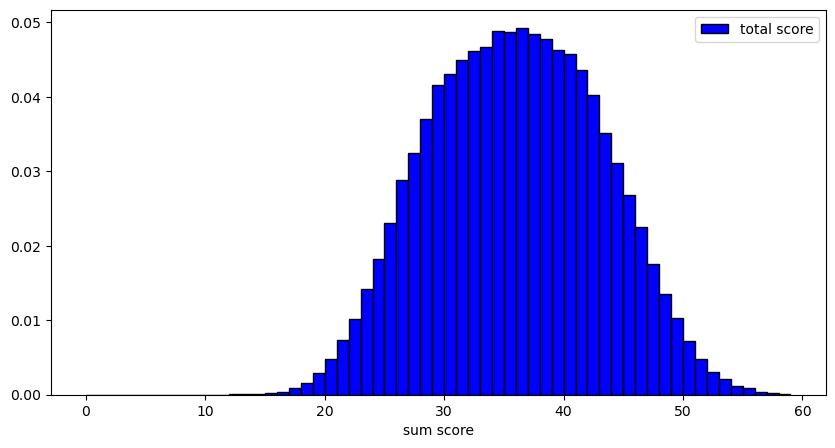

In [15]:
fig,axs = plt.subplots()
fig.set_size_inches(10,5)
x_axis = np.arange(0,60,1)

axs.hist(score_table['total'], x_axis,edgecolor="black", color='blue',label= "total score",density=True) 

axs.legend()
axs.set( xlabel='sum score')

plt.show()

<p align = center>the histogram is perfectly simular to normal distribution with mean of 36</p>
<hr></hr>
<p align = center>now moving on to question 4. again we will take 100000 samples of each distribution with the given parameters and store them.</p>

In [16]:
size = 100000
binomial = pd.Series(np.random.binomial(7072,0.45, size))
poisson = pd.Series(np.random.poisson(3182.59,size))
normal = pd.Series(np.random.normal(3182.59,41.84,size))

<p align = center>part a) this part is simular to problem 2's plotting problem. the range of x axis is chosen by experiment..</p>

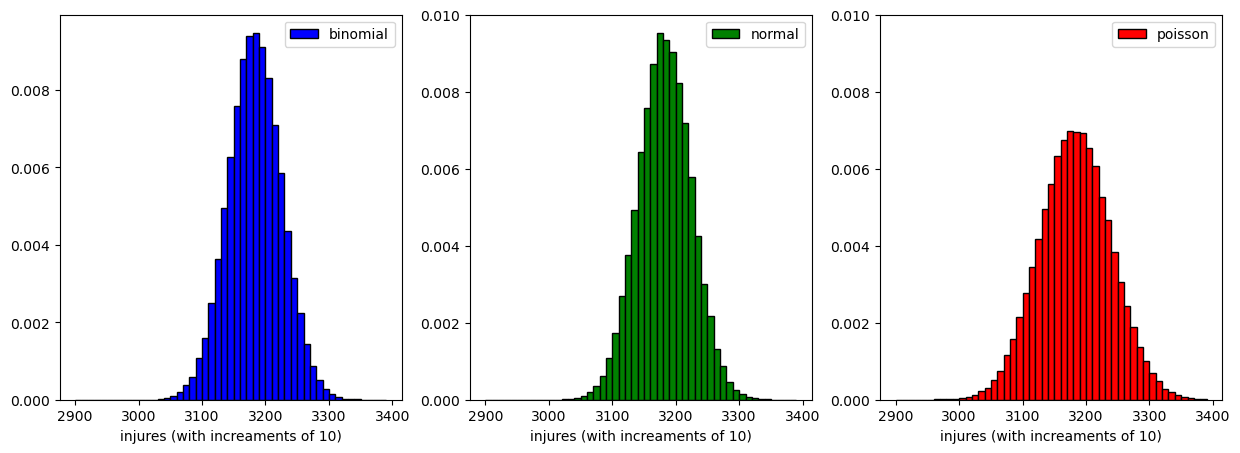

In [17]:
fig,axs = plt.subplots(1,3)
fig.set_size_inches(15,5)
x_axis = np.arange(2900, 3400,10)

axs[0].hist(binomial, x_axis,edgecolor="black", color='blue',label= "binomial", density = True) 
axs[2].hist(poisson, x_axis ,edgecolor="black", color='red',label= "poisson", density = True) 
axs[1].hist(normal, x_axis,edgecolor="black", color='green',label= "normal", density = True) 
for ax in axs:
    ax.legend()
    ax.set( xlabel='injures (with increaments of 10)')
    plt.ylim(0,0.01)

plt.show()

<p align = center>part b) as you can see in above histograms, normal is more simular with binomial in many aspects. normal and binomial are both less spreaded and vary only between 3050 to 3350, but poisson is spreaded between 2950 and 3400. poisson has less probability for certain injury counts than the other distributions and normal and binomial have very close numbers for each injury count. it's also worth to mention that both binomial and normal have a close maximum probablity while the poisson's max is less than both of them with significant number of 0.002. finally it's concluded by the diagrams that as we expected, for this amount of p and n, normal distribution is a better approximation for binomial than poisson. </p>